
# Project: Investigate <a href="https://www.gapminder.org/data/">Gapminder</a> data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this code I studied the different factors on different countries from 1960 to 2015. the data I used is:<br>
1- total GDP inflation adjuted, which I beleive could act as a final representation of wealth.<br>
2- Suicide per 100000 population,  which I beleive could act as a final representation of sadness and depression<br>
3- Population density per square KM, which I wanted to study if the crowded countries correlate  with GDP<br>
4- life expectancy in years, which I thought is a final represetation of general well being<br>.

I planned to study the following:<br>
1- Is there a correlation between the increase in GDP with the increase in the country population <br>
2- Is there a correlation between the increase in country population or with general well being <br>
2- Is there a correlation between the suicide rate with the increase in the GDP<br>

In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline


# load datasets
df_total_gdp_us_inflation_adjusted = pd.read_csv('total_gdp_us_inflation_adjusted.csv',index_col='country',header=0)
df_suicide_per_100000_people = pd.read_csv('suicide_per_100000_people.csv',index_col='country',header=0)
df_population_density_per_square_km = pd.read_csv('population_density_per_square_km.csv',index_col='country',header=0)
df_life_expectancy_years = pd.read_csv('life_expectancy_years.csv',index_col='country',header=0)

<a id='wrangling'></a>
## Data Wrangling

> the data must have an identical number of rows and columns, so we need to check it first




## Data have different size and shapes

in this section I will trim each one of the four dataframes to make them have similar no. of rows (countries) and columns (years).


In [2]:
#using this print stament, we can notice different shapes
print('the shape of df_total_gdp_us_inflation_adjusted is '+ str(df_total_gdp_us_inflation_adjusted.shape[0])+' rows and ' + str(df_total_gdp_us_inflation_adjusted.shape[1])+' columns'
    + '\nthe shape of df_suicide_per_100000_people is '+ str(df_suicide_per_100000_people.shape[0])+' rows and ' + str(df_suicide_per_100000_people.shape[1])+' columns'
    + '\nthe shape of df_population_density_per_square_km is '+ str(df_population_density_per_square_km.shape[0])+' rows and ' + str(df_population_density_per_square_km.shape[1])+' columns'
    + '\nthe shape of df_life_expectancy_years is '+ str(df_life_expectancy_years.shape[0])+' rows and ' + str(df_life_expectancy_years.shape[1])+' columns'
    )

the shape of df_total_gdp_us_inflation_adjusted is 206 rows and 60 columns
the shape of df_suicide_per_100000_people is 118 rows and 67 columns
the shape of df_population_density_per_square_km is 234 rows and 151 columns
the shape of df_life_expectancy_years is 189 rows and 301 columns


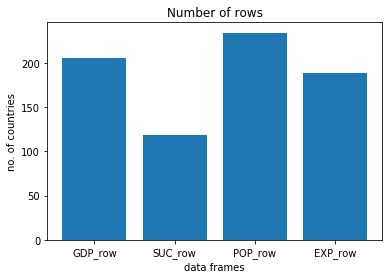

In [3]:
# we can also see a graph for it
plt.bar(['GDP_row','SUC_row','POP_row','EXP_row'],[df_total_gdp_us_inflation_adjusted.shape[0], df_suicide_per_100000_people.shape[0],df_population_density_per_square_km.shape[0], df_life_expectancy_years.shape[0]])
plt.title("Number of rows")
plt.xlabel("data frames")
plt.ylabel("no. of countries");

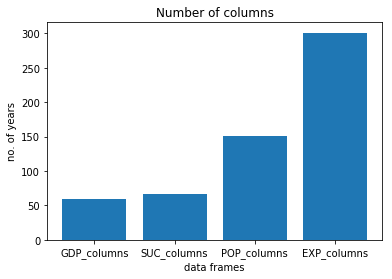

In [4]:
plt.bar(['GDP_columns','SUC_columns','POP_columns','EXP_columns'],[df_total_gdp_us_inflation_adjusted.shape[1], df_suicide_per_100000_people.shape[1],df_population_density_per_square_km.shape[1], df_life_expectancy_years.shape[1]])
plt.title("Number of columns")
plt.xlabel("data frames")
plt.ylabel("no. of years");

In [5]:
#creat column  of indexs that contain the common countries
#first extract the column names for each dataframe _index
df_total_gdp_us_inflation_adjusted_index=pd.DataFrame(df_total_gdp_us_inflation_adjusted.index)
df_suicide_per_100000_people_index=pd.DataFrame(df_suicide_per_100000_people.index)
df_population_density_per_square_km_index=pd.DataFrame(df_population_density_per_square_km.index)
df_life_expectancy_years_index=pd.DataFrame(df_life_expectancy_years.index)

In [6]:
# merging this columns using inner method to eleminate the missed countries
dfs_index = [
            df_total_gdp_us_inflation_adjusted_index,
            df_suicide_per_100000_people_index,
            df_population_density_per_square_km_index,
            df_life_expectancy_years_index,
            df_life_expectancy_years_index,
            ]
#create a dataframe contain the common countries
df_final_index = reduce(lambda left,right: pd.merge(left,right,on='country'), dfs_index)

In [7]:
# slice each dataframe to match the final list of countries usin .isin()
df_total_gdp_us_inflation_adjusted = df_total_gdp_us_inflation_adjusted[df_total_gdp_us_inflation_adjusted.index.isin(df_final_index['country'])]
df_suicide_per_100000_people = df_suicide_per_100000_people[df_suicide_per_100000_people.index.isin(df_final_index['country'])]
df_population_density_per_square_km = df_population_density_per_square_km[df_population_density_per_square_km.index.isin(df_final_index['country'])]
df_life_expectancy_years = df_life_expectancy_years[df_life_expectancy_years.index.isin(df_final_index['country'])]

In [8]:
#simillary do this to columns, as each dataframe has different range of years
#creat column a dataframe of columns that contain the common years
df_total_gdp_us_inflation_adjusted_columns=pd.DataFrame(df_total_gdp_us_inflation_adjusted.columns)
df_suicide_per_100000_people_columns=pd.DataFrame(df_suicide_per_100000_people.columns)
df_population_density_per_square_km_columns=pd.DataFrame(df_population_density_per_square_km.columns)
df_life_expectancy_years_columns=pd.DataFrame(df_life_expectancy_years.columns)

In [9]:
# merging this columns using inner method to eleminate the missed years
df_columns = [
            df_total_gdp_us_inflation_adjusted_columns,
            df_suicide_per_100000_people_columns,
            df_population_density_per_square_km_columns,
            df_life_expectancy_years_columns,
            ]
#create a dataframe contain the common years
df_final_columns = reduce(lambda left,right: pd.merge(left,right,on=0), df_columns)

In [10]:
# slice each dataframe to match the final list of years
df_total_gdp_us_inflation_adjusted=df_total_gdp_us_inflation_adjusted.loc[:,df_final_columns[0]]
df_suicide_per_100000_people = df_suicide_per_100000_people.loc[:,df_final_columns[0]]
df_population_density_per_square_km = df_population_density_per_square_km.loc[:,df_final_columns[0]]
df_life_expectancy_years = df_life_expectancy_years.loc[:,df_final_columns[0]]

In [11]:
print('the shape of df_total_gdp_us_inflation_adjusted is '+ str(df_total_gdp_us_inflation_adjusted.shape[0])+' rows and ' + str(df_total_gdp_us_inflation_adjusted.shape[1])+' columns'
    + '\nthe shape of df_suicide_per_100000_people is '+ str(df_suicide_per_100000_people.shape[0])+' rows and ' + str(df_suicide_per_100000_people.shape[1])+' columns'
    + '\nthe shape of df_population_density_per_square_km is '+ str(df_population_density_per_square_km.shape[0])+' rows and ' + str(df_population_density_per_square_km.shape[1])+' columns'
    + '\nthe shape of df_life_expectancy_years is '+ str(df_life_expectancy_years.shape[0])+' rows and ' + str(df_life_expectancy_years.shape[1])+' columns'
    )

the shape of df_total_gdp_us_inflation_adjusted is 103 rows and 57 columns
the shape of df_suicide_per_100000_people is 103 rows and 57 columns
the shape of df_population_density_per_square_km is 103 rows and 57 columns
the shape of df_life_expectancy_years is 103 rows and 57 columns


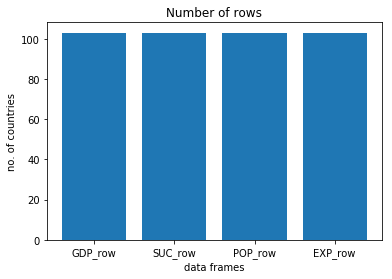

In [12]:
# now they have simillar rows
plt.bar(['GDP_row','SUC_row','POP_row','EXP_row'],[df_total_gdp_us_inflation_adjusted.shape[0], df_suicide_per_100000_people.shape[0],df_population_density_per_square_km.shape[0], df_life_expectancy_years.shape[0]])
plt.title("Number of rows")
plt.xlabel("data frames")
plt.ylabel("no. of countries");

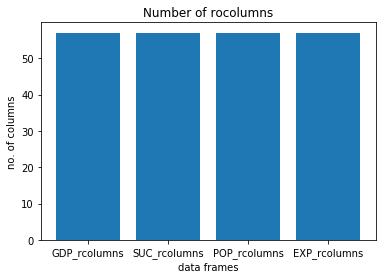

In [13]:
# and simillar columns
plt.bar(['GDP_rcolumns','SUC_rcolumns','POP_rcolumns','EXP_rcolumns'],[df_total_gdp_us_inflation_adjusted.shape[1], df_suicide_per_100000_people.shape[1],df_population_density_per_square_km.shape[1], df_life_expectancy_years.shape[1]])
plt.title("Number of rocolumns")
plt.xlabel("data frames")
plt.ylabel("no. of columns");


## Data have different Data types

> in this section I will convert each dataframe to float


In [14]:
#allready float
df_suicide_per_100000_people.dtypes

1960    float64
1961    float64
1962    float64
1963    float64
1964    float64
1965    float64
1966    float64
1967    float64
1968    float64
1969    float64
1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
dtype: object

In [15]:
df_population_density_per_square_km.dtypes

1960    object
1961    object
1962    object
1963    object
1964    object
1965    object
1966    object
1967    object
1968    object
1969    object
1970    object
1971    object
1972    object
1973    object
1974    object
1975    object
1976    object
1977    object
1978    object
1979    object
1980    object
1981    object
1982    object
1983    object
1984    object
1985    object
1986    object
1987    object
1988    object
1989    object
1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
dtype: object

In [16]:
#convert the Object to float
df_population_density_per_square_km=df_population_density_per_square_km.astype(float)

In [17]:
#now check it
df_population_density_per_square_km.dtypes

1960    float64
1961    float64
1962    float64
1963    float64
1964    float64
1965    float64
1966    float64
1967    float64
1968    float64
1969    float64
1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
dtype: object

In [18]:
#allready a float
df_life_expectancy_years.dtypes

1960    float64
1961    float64
1962    float64
1963    float64
1964    float64
1965    float64
1966    float64
1967    float64
1968    float64
1969    float64
1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
dtype: object

In [19]:
df_total_gdp_us_inflation_adjusted.dtypes

#cant be convert to a float
# df_total_gdp_us_inflation_adjusted.astype(float)

1960    object
1961    object
1962    object
1963    object
1964    object
1965    object
1966    object
1967    object
1968    object
1969    object
1970    object
1971    object
1972    object
1973    object
1974    object
1975    object
1976    object
1977    object
1978    object
1979    object
1980    object
1981    object
1982    object
1983    object
1984    object
1985    object
1986    object
1987    object
1988    object
1989    object
1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
dtype: object

In [20]:
# df_total_gdp_us_inflation_adjusted contain different value such as B stands for Bilion and TR for trilion
# this function will transfer these strings to float
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if 'TR' in x:
        return float(x.replace('TR', '')) * 1000000000000
        return 1000000000000.0
        return 0.0


In [21]:
# applying this function to each column
for i in df_total_gdp_us_inflation_adjusted.columns:
    df_total_gdp_us_inflation_adjusted[i]=df_total_gdp_us_inflation_adjusted[i].apply(value_to_float)

#now the values is float
df_total_gdp_us_inflation_adjusted.dtypes

1960    float64
1961    float64
1962    float64
1963    float64
1964    float64
1965    float64
1966    float64
1967    float64
1968    float64
1969    float64
1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
dtype: object

**Finally**, the data frames are similar to each other with the years and with the countries, we can study them more

<a id='eda'></a>
## Exploratory Data Analysis




### Data  visual Exploration

In [22]:
# first of all, we will create a variable for each data
df_GDP = df_total_gdp_us_inflation_adjusted
df_SUC = df_suicide_per_100000_people
df_DIN = df_population_density_per_square_km
df_EXP = df_life_expectancy_years

In [23]:
#transpose each data frame 
df_GDP_Trans = df_GDP.T 
df_SUC_Trans = df_SUC.T
df_DIN_Trans=df_DIN.T
df_EXP_Trans=df_EXP.T

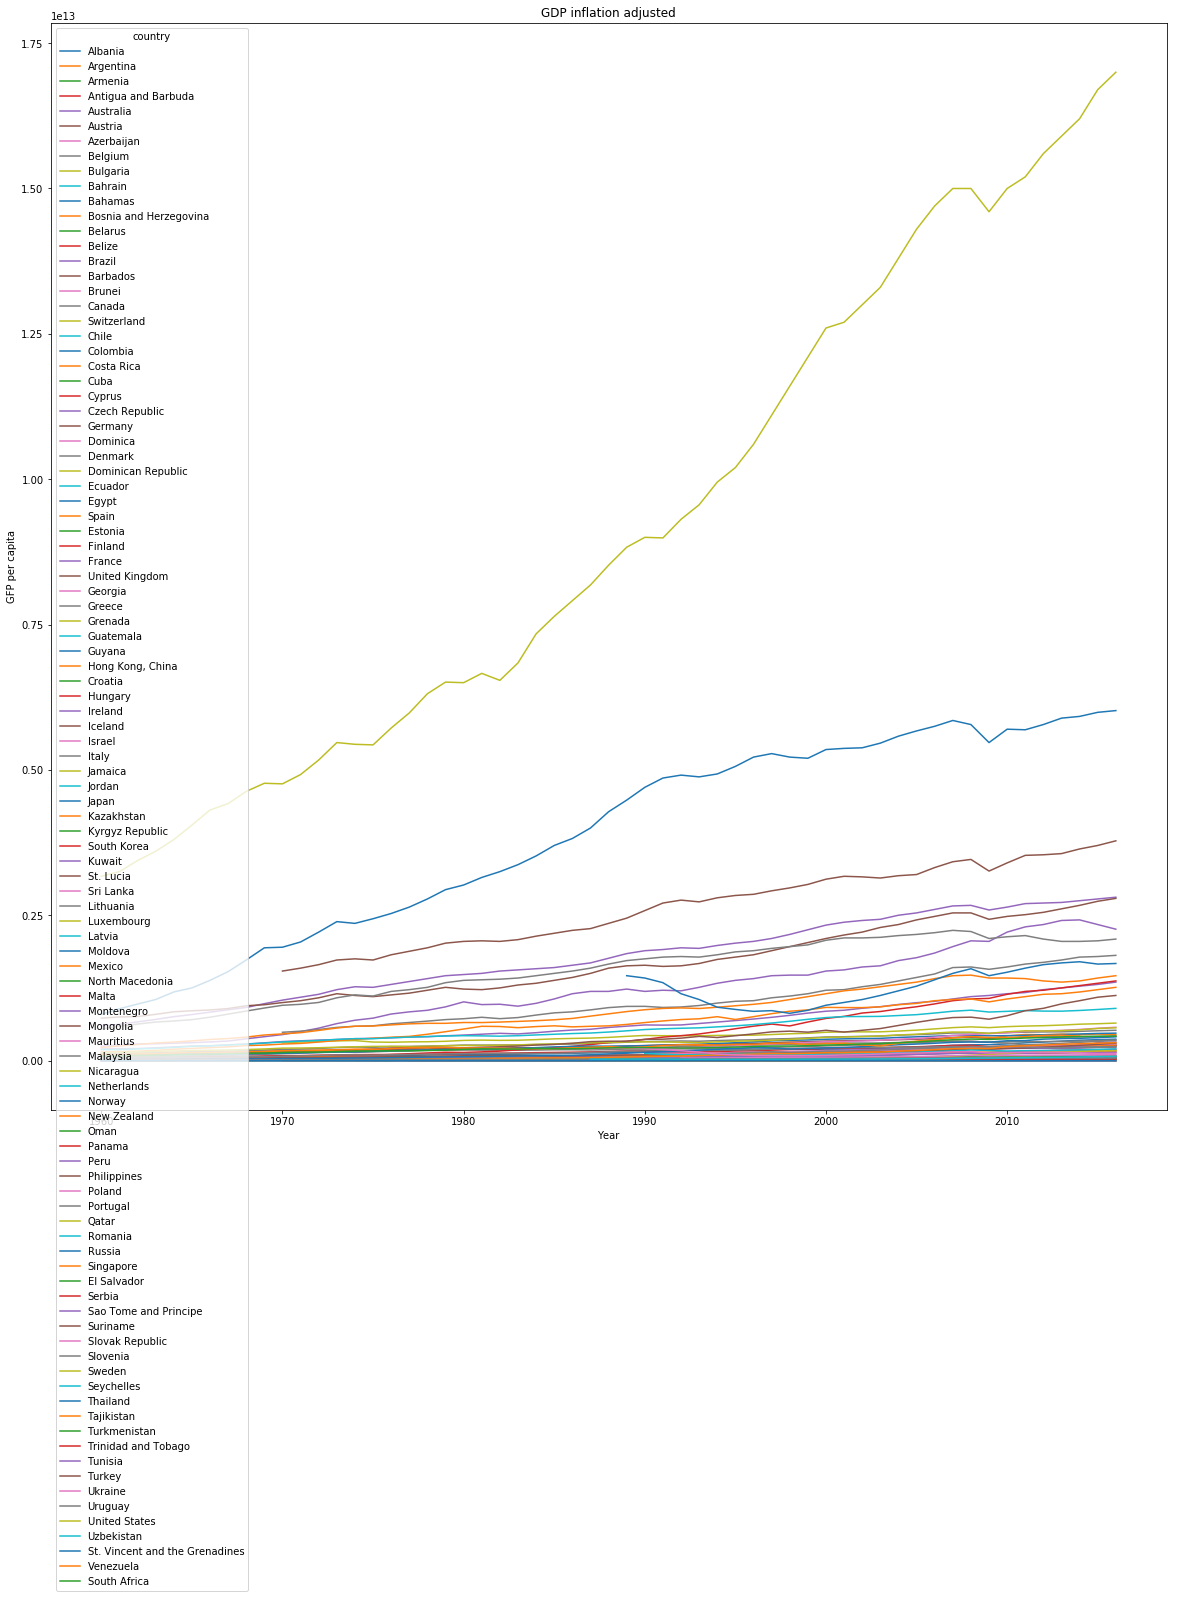

In [24]:
# general plot of GDP
df_GDP_Trans.plot(figsize=(20, 20), xlabel='Year', ylabel='GFP per capita', title='GDP inflation adjusted');

>**sounds noisy, let us grap the highest and lowest contries**

In [25]:
# sorting the values
df=df_GDP
df.sort_values('2010',ascending = False, inplace=True)

In [26]:
Max_GDP=df.head()

In [27]:
#top 5 countries
Max_GDP.index

Index(['United States', 'Japan', 'Germany', 'France', 'United Kingdom'], dtype='object', name='country')

In [28]:
Low_GDP=df.tail()

In [29]:
#bottom low 5 countries
Low_GDP.index

Index(['Seychelles', 'Grenada', 'St. Vincent and the Grenadines', 'Dominica',
       'Sao Tome and Principe'],
      dtype='object', name='country')

In [30]:
# creatting a list of high GDP countries
Max_con=Max_GDP.index
Max_con

Index(['United States', 'Japan', 'Germany', 'France', 'United Kingdom'], dtype='object', name='country')

In [31]:
# creatting a list of low GDP countries
Low_con=Low_GDP.index
Low_con

Index(['Seychelles', 'Grenada', 'St. Vincent and the Grenadines', 'Dominica',
       'Sao Tome and Principe'],
      dtype='object', name='country')

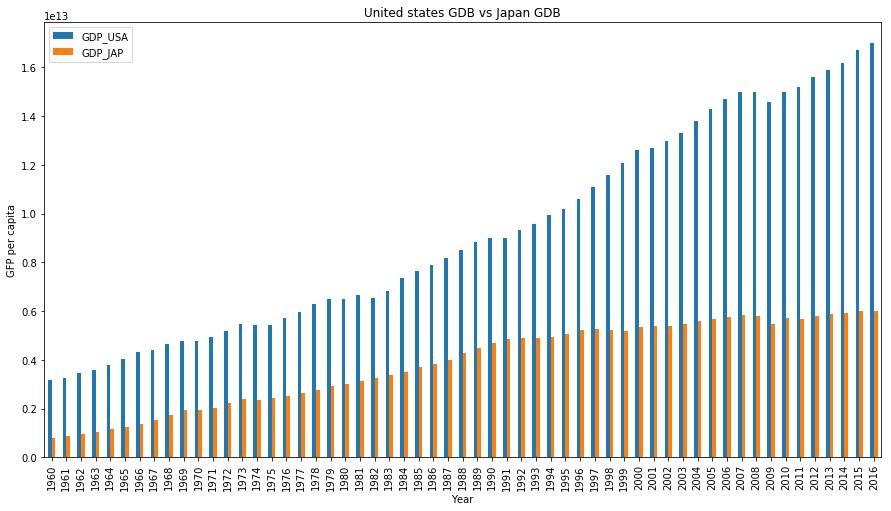

In [32]:
# mroe exploring for the different betwwen the top two countries in GDP
df_plot1= pd.concat([df_GDP_Trans['United States'], df_GDP_Trans['Japan']], axis=1,keys= ['GDP_USA','GDP_JAP'])
df_plot1
# plt.style.use('ggplot')
df_plot1.plot(kind='bar', figsize=(15,8), xlabel='Year', ylabel='GFP per capita', title='United states GDB vs Japan GDB');

### Is there a correlation between the increase in GDP with population density?
> **I wanted to answer this question, is the crowded countries suffer from low GDP?**.

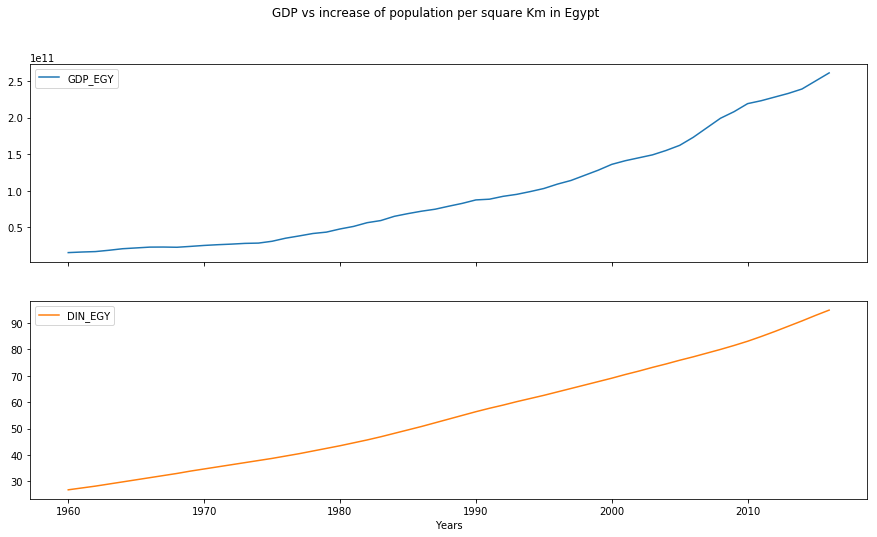

In [33]:
df_plot_EGY= pd.concat([df_GDP_Trans['Egypt'], df_DIN_Trans['Egypt']], axis=1,keys= ['GDP_EGY','DIN_EGY'])
df_plot_EGY.plot(subplots=True, figsize=(15,8),title=("GDP vs increase of population per square Km in Egypt"),xlabel=("Years"));

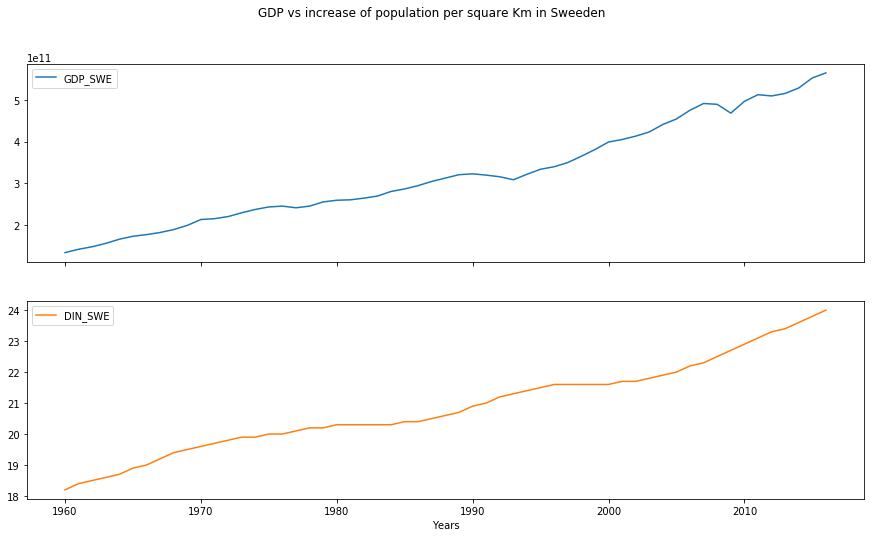

In [34]:
df_plot_SWE= pd.concat([df_GDP_Trans['Sweden'], df_DIN_Trans['Sweden']], axis=1,keys= ['GDP_SWE','DIN_SWE'])
df_plot_SWE.plot(subplots=True, figsize=(15,8),title=("GDP vs increase of population per square Km in Sweeden"),xlabel=("Years"));

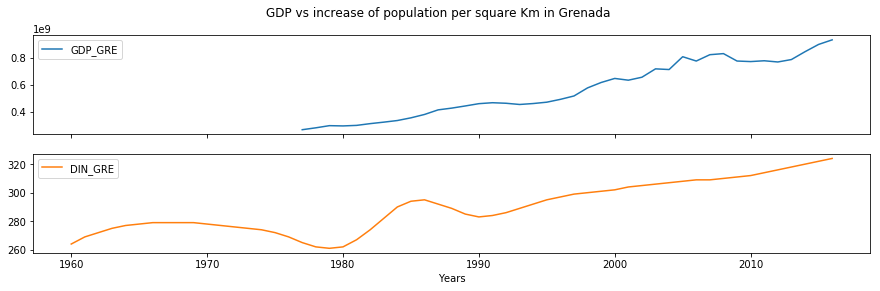

In [35]:
df_plot_GRE= pd.concat([df_GDP_Trans['Grenada'], df_DIN_Trans['Grenada']], axis=1,keys= ['GDP_GRE','DIN_GRE'])
df_plot_GRE.plot(subplots=True, figsize=(15,4),title=("GDP vs increase of population per square Km in Grenada"),xlabel=("Years"));

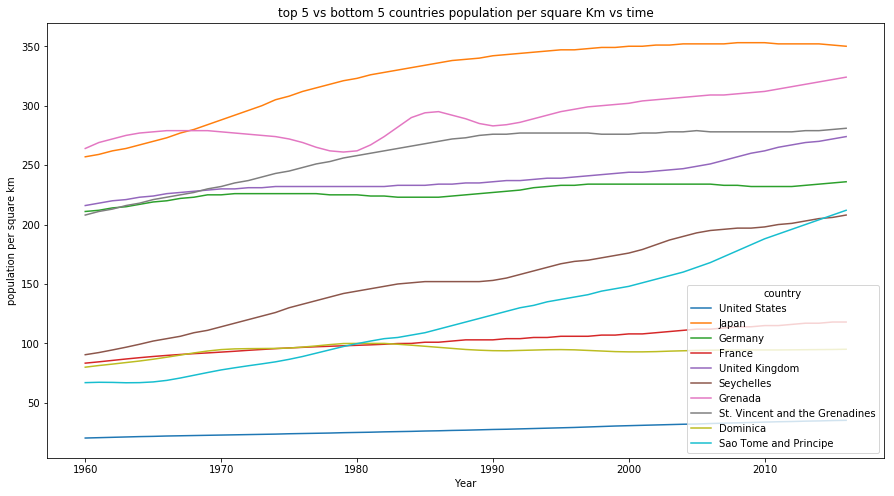

In [36]:
# top top 5 vs bottom 5 countries
df_plot2= pd.concat([df_DIN_Trans[Max_con], df_DIN_Trans[Low_con]], axis=1)
df_plot2
# plt.style.use('ggplot')
df_plot2.plot(kind='line', figsize=(15,8), xlabel='Year', ylabel='population per square km', title='top 5 vs bottom 5 countries population per square Km vs time');



### Is there a correlation between GDP or with general well being
> **I wanted to answer this question, is the crowded countries suffer from low life expectency?**.


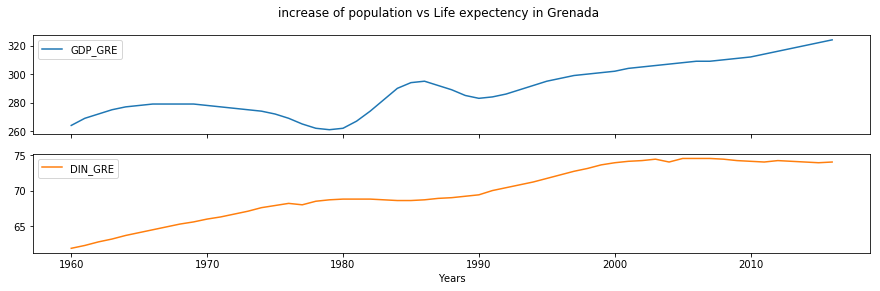

In [37]:
df_plot5= pd.concat([df_DIN_Trans['Grenada'], df_EXP_Trans['Grenada']], axis=1,keys= ['GDP_GRE','DIN_GRE'])

df_plot5.plot(subplots=True, figsize=(15,4),title=("increase of population vs Life expectency in Grenada"),xlabel=("Years"));

In [38]:
df_plot5= pd.concat([df_EXP_Trans['Japan'],
                        df_EXP_Trans['Seychelles'],
                        df_EXP_Trans['Grenada'],
                        df_EXP_Trans['St. Vincent and the Grenadines'],
                        df_EXP_Trans['Dominica'], 
                        df_EXP_Trans['Sao Tome and Principe'],                         
                        ], axis=1,keys= ['Japan','Seychelles', 'Grenada','St. Vincent and the Grenadines', 'Dominica', 'Sao Tome and Principe'])

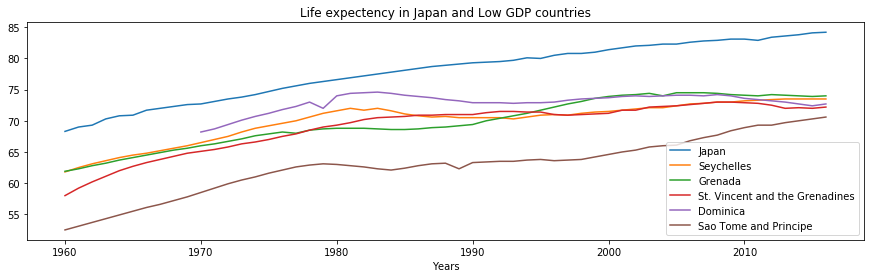

In [39]:
df_plot5.plot(figsize=(15,4),title=("Life expectency in Japan and Low GDP countries"),xlabel=("Years"));

### Is there a correlation between the suicide rate with the increase in the GDP

In [40]:
# sorting the values of the highest countries in suicide rate for 2010
df2=df_SUC
df2.sort_values('2010',ascending = False, inplace=True)

Max_SUC=df2.head()

#top 5 countries
Max_SUC.index

Index(['Lithuania', 'South Korea', 'Hungary', 'Japan', 'Latvia'], dtype='object', name='country')

In [41]:
#creat an Index for these countries
Max_SUC_con=Max_SUC.index

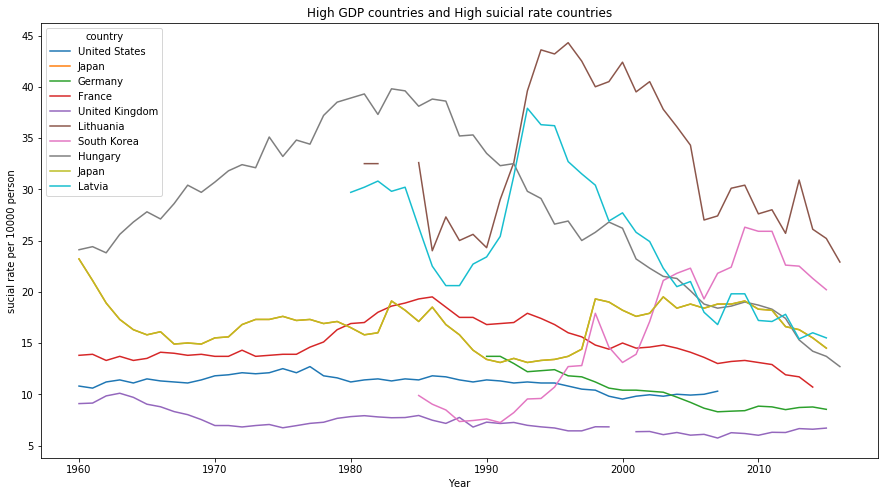

In [42]:
df_plot6= pd.concat([df_SUC_Trans[Max_con], df_SUC_Trans[Max_SUC_con]], axis=1)
df_plot6
# plt.style.use('ggplot')
df_plot6.plot(kind='line', figsize=(15,8), xlabel='Year', ylabel='sucial rate per 10000 person', title='High GDP countries and High suicial rate countries');

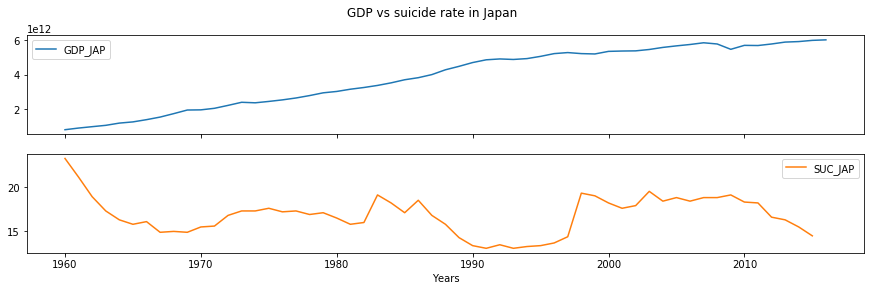

In [43]:
df_plot7= pd.concat([df_GDP_Trans['Japan'], df_SUC_Trans['Japan']], axis=1,keys= ['GDP_JAP','SUC_JAP'])

df_plot7.plot(subplots=True, figsize=(15,4),title=("GDP vs suicide rate in Japan"),xlabel=("Years"));

<a id='conclusions'></a>
## Conclusions

**GDP VS population density**: my observation were as follow: <br>
1- increasing in GDP is always associated with increase in population per square Km. <br>
2- when comparing the results of Egypt and Sweden, I noticed that when Egypt population increased from 30 to 90 resulted in an increase in GPD with 2.5 while incase of Sweden, an increase in population of 8 per square Km resulted in increase in GDP up to 5.<br>
3- Any flat curve in population might reflect in decrase in GDP in the following years as shown in Grenada and Sweden.<br>
4- Low pupulation per square Km countries dosn't always have low GDP and vise versa <br>

**Populationdensity VS life expectancy**: my observation were as follow: <br>
low GDP countries suffer from low life expectancy <br>

**GDP Vs sucide rate**: my observation were as follow: <br>
no correlation observed

# Limitation

1- too many nan values, and I couldn't fill them with mean as they may change the data. <br>
2- in the cleaning process, many countries (such as China) were lost. <br>
3- could be much better to obtain the slope and intercept of the regression equation of the GDP curve.<br>
